<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal/R_Multiple/R_M%C3%BAltiple_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
# Separamos el dataframe solo con datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,56.0,0.41,1652.0,2.0,56.0,0,4,3,3,1
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,0.0,1.13,3663.0,1.0,12.0,0,3,0,3,2
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,64.0,0.42,1275.0,2.0,26.0,0,4,3,3,1
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,161.0,1.19,814.0,3.0,36.0,0,9,3,3,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,49.0,0.32,1923.0,2.0,21.0,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,0.0,1.13,7850.0,2.0,31.0,0,4,3,3,1
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,0.0,1.13,1478.0,2.0,48.0,0,4,3,3,1
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,0.0,1.13,936.0,1.0,39.0,0,4,3,3,1
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,0.0,1.13,768.0,2.0,10.0,0,4,3,3,1


In [4]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(df.corr())
corrTabla

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
host_id,1.000000,0.973972,0.019587,0.065158,0.050434,0.024779,0.195314,0.008484,0.045293,0.086760,...,0.180991,0.059448,0.013642,0.033256,0.084325,0.025434,0.032154,0.024847,0.039633,0.043605
host_since,0.973972,1.000000,0.023388,0.062299,0.053921,0.019141,0.184553,0.003538,0.033786,0.087315,...,0.171026,0.063195,0.029945,0.032370,0.089218,0.041192,0.036406,0.022336,0.021545,0.026390
host_response_rate,0.019587,0.023388,1.000000,0.465825,0.216644,0.059002,0.055721,0.004989,0.069072,0.022510,...,0.151709,0.173335,0.036309,0.060319,0.202848,0.129001,0.024838,0.794428,0.073278,0.062505
host_acceptance_rate,0.065158,0.062299,0.465825,1.000000,0.272430,0.100070,0.042591,0.004490,0.087590,0.001111,...,0.210526,0.252430,0.077219,0.088190,0.237314,0.163799,0.005317,0.495164,0.123286,0.082614
host_is_superhost,0.050434,0.053921,0.216644,0.272430,1.000000,0.048652,0.067791,0.125356,0.080251,0.003190,...,0.238078,0.270771,0.084401,0.122870,0.326623,0.181473,0.037056,0.208239,0.125819,0.080345
host_listings_count,0.024779,0.019141,0.059002,0.100070,0.048652,1.000000,0.039455,0.055578,0.110857,0.047360,...,0.006418,0.082546,0.116196,0.031093,0.085095,0.133173,0.001173,0.093490,0.097332,0.087757
host_has_profile_pic,0.195314,0.184553,0.055721,0.042591,0.067791,0.039455,1.000000,0.028967,0.025852,0.033601,...,0.066761,0.016523,0.015564,0.037186,0.096708,0.025243,0.018098,0.056129,0.023486,0.019519
host_identity_verified,0.008484,0.003538,0.004989,0.004490,0.125356,0.055578,0.028967,1.000000,0.080243,0.002377,...,0.091302,0.081323,0.024397,0.072741,0.162410,0.100635,0.029130,0.052821,0.084301,0.066468
latitude,0.045293,0.033786,0.069072,0.087590,0.080251,0.110857,0.025852,0.080243,1.000000,0.059931,...,0.091219,0.148635,0.057175,0.039965,0.098641,0.125952,0.119160,0.090659,0.091372,0.604243
longitude,0.086760,0.087315,0.022510,0.001111,0.003190,0.047360,0.033601,0.002377,0.059931,1.000000,...,0.029472,0.061673,0.128922,0.021952,0.094039,0.072610,0.124677,0.014429,0.059218,0.326836


<Axes: >

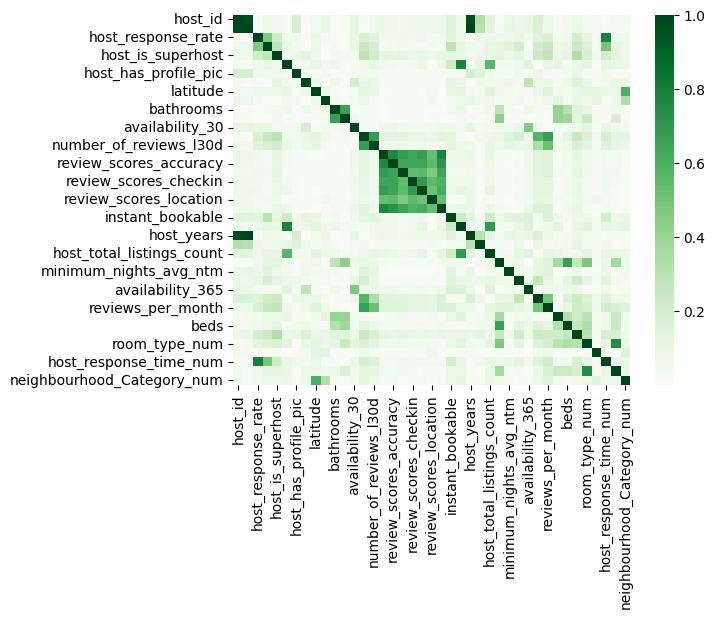

In [5]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Greens')
Heat_Map

In [6]:
# Hacemos una copia que guarde las predicciones
dfPredict = df.copy()

# Modelo de regresión múltiple

## Host ID

In [7]:
# Se filtran las correlaciones fuertes
hostModel = abs(df.corr()['host_id'])
hostModel = hostModel[hostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
hostModel

,host_id
host_id,1.000000
host_years,0.973972
host_since,0.973972
host_verifications_num,0.318119


<Axes: >

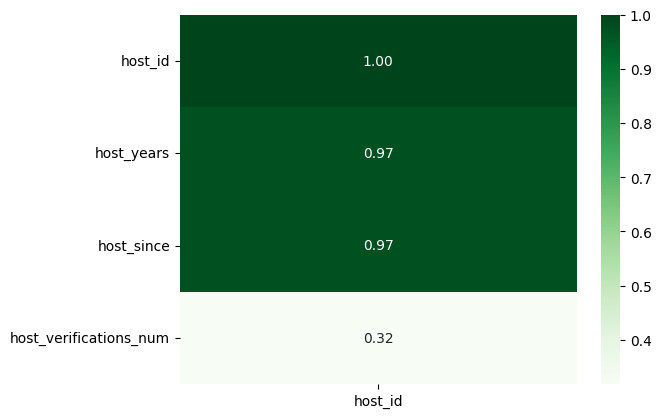

In [8]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(hostModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map1

<Axes: xlabel='host_years', ylabel='host_id'>

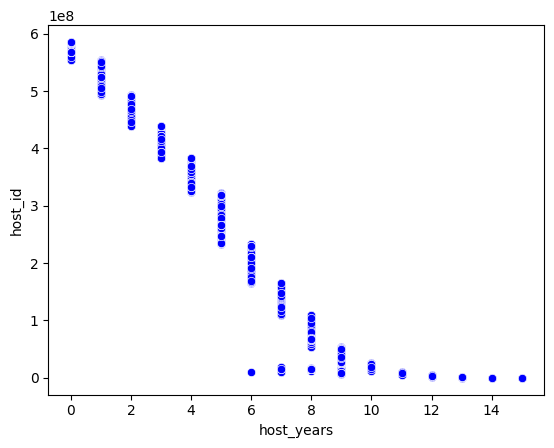

In [9]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_years', y = 'host_id', color = 'blue', data = df) # Independiente, Dependiente, color, df

In [10]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_years","host_verifications_num"]] # Independiente = x
Var_Dep = df[["host_id"]] # Dependiente = y

# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_years', 'host_verifications_num'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[-54180538.05466852,  -8236726.48804974]]),
 'rank_': 2,
 'singular_': array([525.70512249,  73.37309066]),
 'intercept_': array([5.6634648e+08])}

**Modelo matemático: Y = -54180538.05466852x1  -8236726.48804974x2 + 5.6634648e+08**

In [11]:
# Predecimos los valores
y_pred = model.predict(X = df[["host_years","host_verifications_num"]])
y_pred


array([[-4.61128913e+07],
       [-2.16891232e+08],
       [-2.16891232e+08],
       ...,
       [ 5.40114583e+07],
       [ 1.70609261e+08],
       [ 1.16428723e+08]])

In [12]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_id', y_pred)
dfPredict

,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,-4.611289e+07,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,...,56.0,0.41,1652.0,2.0,56.0,0,4,3,3,1
1,-2.168912e+08,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,...,0.0,1.13,3663.0,1.0,12.0,0,3,0,3,2
2,-2.168912e+08,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,...,64.0,0.42,1275.0,2.0,26.0,0,4,3,3,1
3,-4.611289e+07,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,...,161.0,1.19,814.0,3.0,36.0,0,9,3,3,2
4,-1.544740e+08,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,...,49.0,0.32,1923.0,2.0,21.0,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,8.067647e+06,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,...,0.0,1.13,7850.0,2.0,31.0,0,4,3,3,1
26532,-4.611289e+07,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,...,0.0,1.13,1478.0,2.0,48.0,0,4,3,3,1
26533,5.401146e+07,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,...,0.0,1.13,936.0,1.0,39.0,0,4,3,3,1
26534,1.706093e+08,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,...,0.0,1.13,768.0,2.0,10.0,0,4,3,3,1


<Axes: xlabel='host_years', ylabel='host_id'>

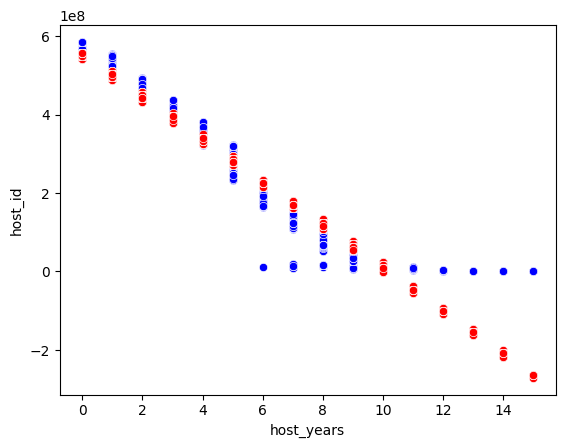

In [13]:
# Gráfica de comparación
sns.scatterplot(x = 'host_years', y = 'host_id', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_years', y = 'Predict_Host_id', color = "red", data = dfPredict)

In [14]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9741893733844388

#host_acceptance_rate

<Axes: >

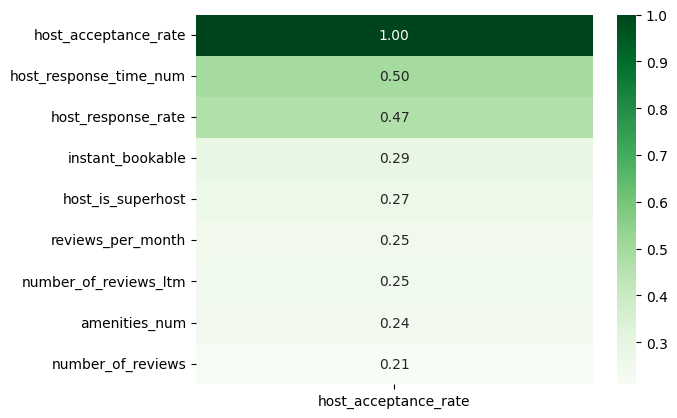

In [15]:
# Filtrando las correlaciones fuertes
AcceptanceModel = abs(df.corr()['host_acceptance_rate'])
AcceptanceModel = AcceptanceModel[AcceptanceModel.abs() > 0.2].sort_values(ascending=False).to_frame()
AcceptanceModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(AcceptanceModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

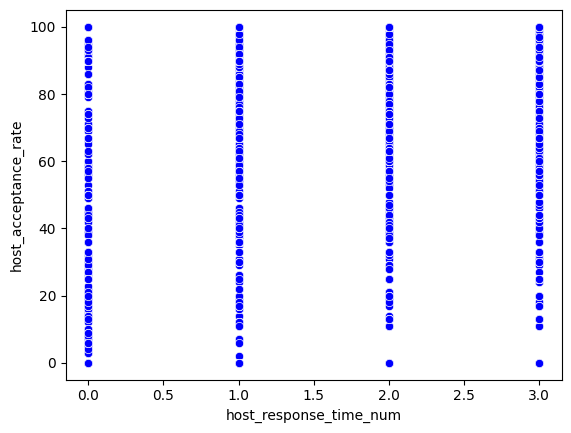

In [16]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = df) # Independiente, Dependiente, color, df

In [17]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_response_time_num","host_response_rate","instant_bookable","host_is_superhost","reviews_per_month","number_of_reviews_ltm","amenities_num","number_of_reviews"]] # Independiente = x
Var_Dep = df[["host_acceptance_rate"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[["host_response_time_num","host_response_rate","instant_bookable","host_is_superhost","reviews_per_month","number_of_reviews_ltm","amenities_num","number_of_reviews"]])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_Acceptance', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.58355367643316

In [18]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_time_num', 'host_response_rate', 'instant_bookable',
        'host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'amenities_num', 'number_of_reviews'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([[8.34440259, 0.23052423, 8.24811559, 3.60051901, 0.74409435,
         0.04385448, 0.10412022, 0.0227205 ]]),
 'rank_': 8,
 'singular_': array([8250.68991412, 2920.67875565, 2499.26024845, 2280.17042001,
         157.36729186,   89.78267927,   79.06714783,   64.10565811]),
 'intercept_': array([34.28905498])}

**Modelo matemático: Y = 8.34440259x1 + 0.23052423x2 + 8.24811559x3 + 3.60051901x4 + 0.74409435x5 + 0.04385448x6 + 0.10412022x7 + 0.0227205x8 + 34.28905498**

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

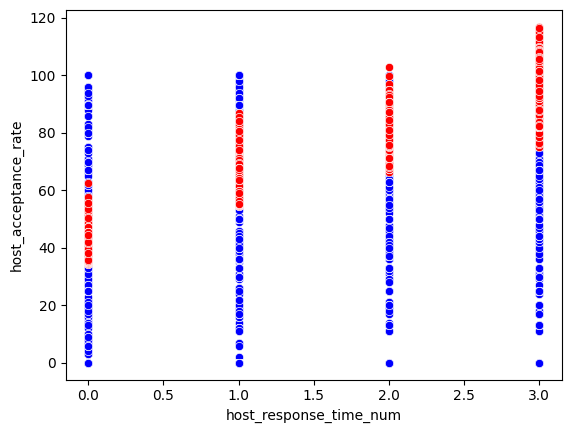

In [19]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_response_time_num', y = 'Predict_Host_Acceptance', color = "red", data = dfPredict)

# host_is_superhost

<Axes: >

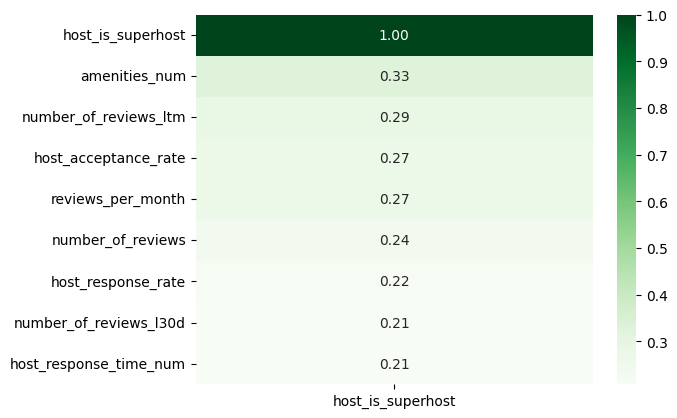

In [20]:
# Filtrando las correlaciones fuertes
SuperHostModel = abs(df.corr()['host_is_superhost'])
SuperHostModel = SuperHostModel[SuperHostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
SuperHostModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(SuperHostModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map3

In [21]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["amenities_num","number_of_reviews_ltm","host_acceptance_rate","reviews_per_month","number_of_reviews","host_response_rate","number_of_reviews_l30d","host_response_time_num"]] # Independiente = x
Var_Dep = df[["host_is_superhost"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[["amenities_num","number_of_reviews_ltm","host_acceptance_rate","reviews_per_month","number_of_reviews","host_response_rate","number_of_reviews_l30d","host_response_time_num"]])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_SuperHost', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.43388075755272654

In [22]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['amenities_num', 'number_of_reviews_ltm', 'host_acceptance_rate',
        'reviews_per_month', 'number_of_reviews', 'host_response_rate',
        'number_of_reviews_l30d', 'host_response_time_num'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([[0.00889357, 0.00289122, 0.00352622, 0.03871487, 0.00059137,
         0.00234917, 0.00388059, 0.00558946]]),
 'rank_': 8,
 'singular_': array([8303.75139052, 3883.19698109, 2563.15957334, 2314.08266435,
        2209.75911489,  207.07069263,  152.45960549,   64.87788641]),
 'intercept_': array([-0.45905171])}

**Modelo matemático: Y = 0.00889357x1 + 0.00289122x2 + 0.00352622x3 + 0.03871487x4 + 0.00059137x5 + 0.00234917x6 0.00388059x7 0.00558946x8 -0.45905171**

<Axes: xlabel='amenities_num', ylabel='host_is_superhost'>

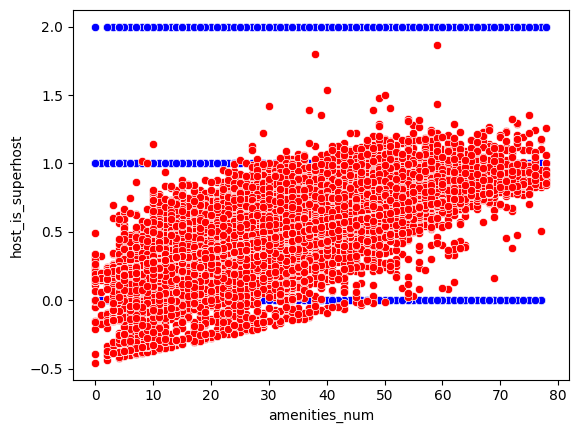

In [23]:
# Gráfica de comparación
sns.scatterplot(x = 'amenities_num', y = 'host_is_superhost', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'amenities_num', y = 'Predict_SuperHost', color = "red", data = dfPredict)

# host_total_listings_count

<Axes: >

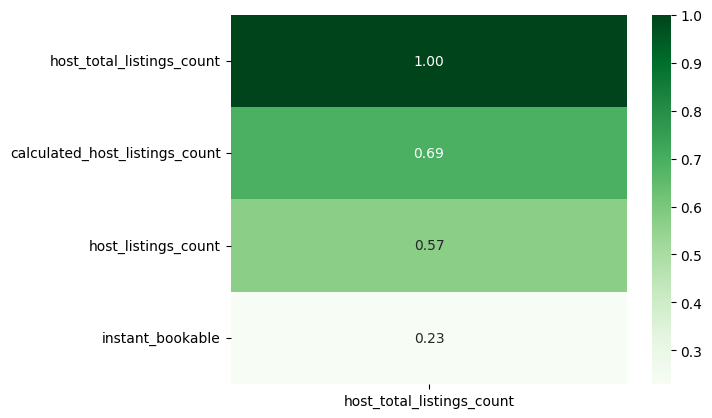

In [24]:
# Filtrando las correlaciones fuertes
hostTotalListings = abs(df.corr()['host_total_listings_count'])
hostTotalListings = hostTotalListings[hostTotalListings.abs() > 0.15].sort_values(ascending=False).to_frame()
hostTotalListings
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map4 = sns.heatmap(hostTotalListings, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map4

In [25]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['calculated_host_listings_count','host_listings_count', 'instant_bookable']] # Independiente = x
Var_Dep = df[["host_total_listings_count"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['calculated_host_listings_count','host_listings_count', 'instant_bookable']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_TotalListings', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6962093615553169

In [26]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count', 'host_listings_count',
        'instant_bookable'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[0.81108179, 0.04187747, 8.11002963]]),
 'rank_': 3,
 'singular_': array([14723.48467957,  4037.13666403,    77.18952566]),
 'intercept_': array([4.64984301])}

**Modelo matemático: Y =  0.81108179x1 + 0.04187747x2 + 8.11002963x3 + 4.64984301**

<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

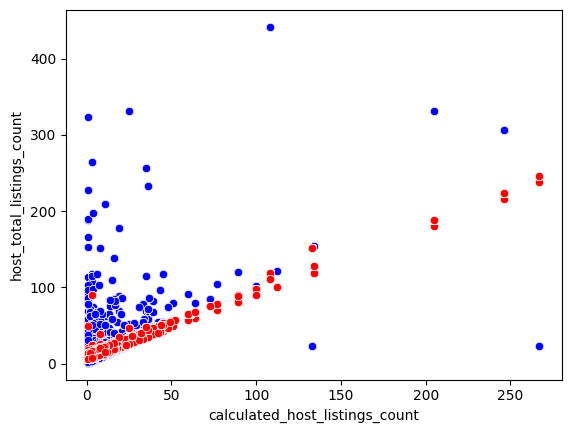

In [27]:
# Gráfica de comparación
sns.scatterplot(x = 'calculated_host_listings_count', y = 'host_total_listings_count', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'calculated_host_listings_count', y = 'Predict_Host_TotalListings', color = "red", data = dfPredict)

# room_type

<Axes: >

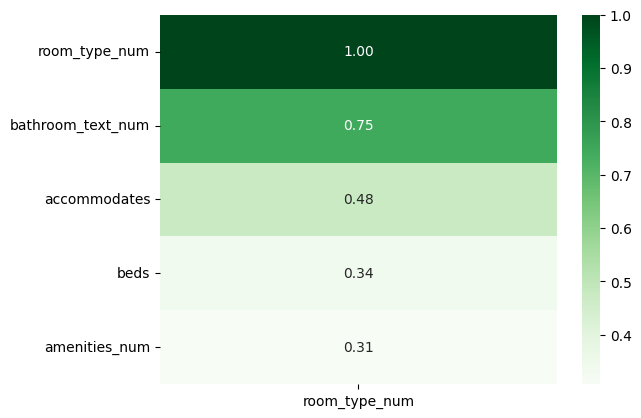

In [28]:
# Filtrando las correlaciones fuertes
roomTypeModel = abs(df.corr()['room_type_num'])
roomTypeModel = roomTypeModel[roomTypeModel.abs() > 0.30].sort_values(ascending=False).to_frame()
roomTypeModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map5 = sns.heatmap(roomTypeModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map5

In [29]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['bathroom_text_num', 'accommodates', 'beds', 'amenities_num']] # Independiente = x
Var_Dep = df[["room_type_num"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['bathroom_text_num', 'accommodates', 'beds', 'amenities_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_RoomType', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7867189132564857

In [30]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathroom_text_num', 'accommodates', 'beds', 'amenities_num'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([[ 0.856859  , -0.10421452, -0.01765034, -0.00834254]]),
 'rank_': 4,
 'singular_': array([2516.41518228,  305.45786888,  122.61679868,  107.92444348]),
 'intercept_': array([-1.58807422])}

**Modelo matemático: Y = 0.856859x1 -0.10421452x2 -0.01765034x3 -0.00834254 -1.58807422**

<Axes: xlabel='accommodates', ylabel='room_type_num'>

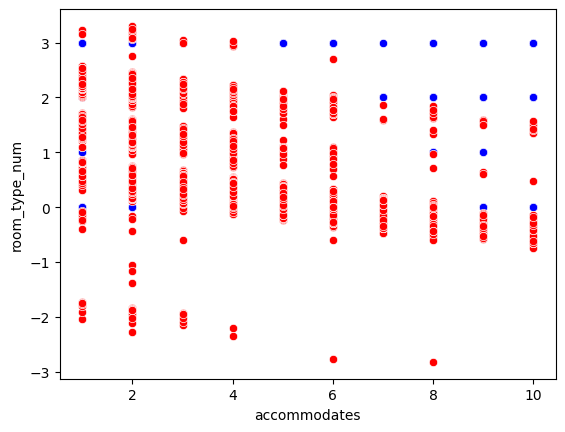

In [31]:
# Gráfica de comparación
sns.scatterplot(x = 'accommodates', y = 'room_type_num', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'accommodates', y = 'Predict_RoomType', color = "red", data = dfPredict)

# accommodates

<Axes: >

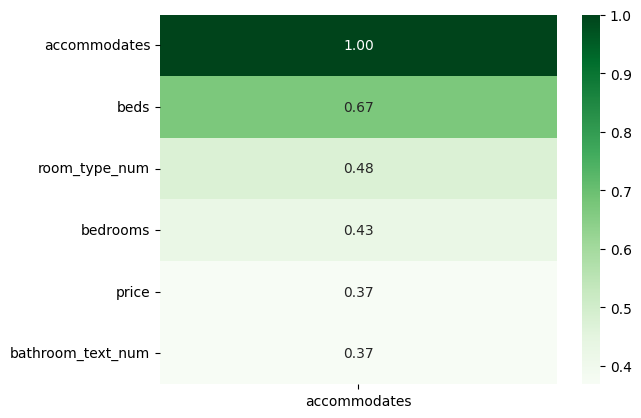

In [32]:
# Filtrando las correlaciones fuertes
accomodatesModel = abs(df.corr()['accommodates'])
accomodatesModel = accomodatesModel[accomodatesModel.abs() > 0.30].sort_values(ascending=False).to_frame()
accomodatesModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map6 = sns.heatmap(accomodatesModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map6

In [33]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['beds', 'room_type_num', 'bedrooms', 'price', 'bathroom_text_num']] # Independiente = x
Var_Dep = df[["accommodates"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['beds', 'room_type_num', 'bedrooms', 'price', 'bathroom_text_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Accommodates', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)


0.7416060887915887

In [34]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'room_type_num', 'bedrooms', 'price', 'bathroom_text_num'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([[ 8.13279995e-01, -3.96873601e-01,  2.04405031e-01,
          1.07500585e-04, -9.39636740e-02]]),
 'rank_': 5,
 'singular_': array([1.92248992e+05, 2.14372442e+02, 1.70073081e+02, 1.43586968e+02,
        6.73581266e+01]),
 'intercept_': array([1.9278874])}

**Modelo matemático: Y = 8.13279995e-01x1 -3.96873601e-01x2 +  2.04405031e-01x3 + 1.07500585e-04x4 -9.39636740e-02x5 + 1.9278874**

<Axes: xlabel='beds', ylabel='accommodates'>

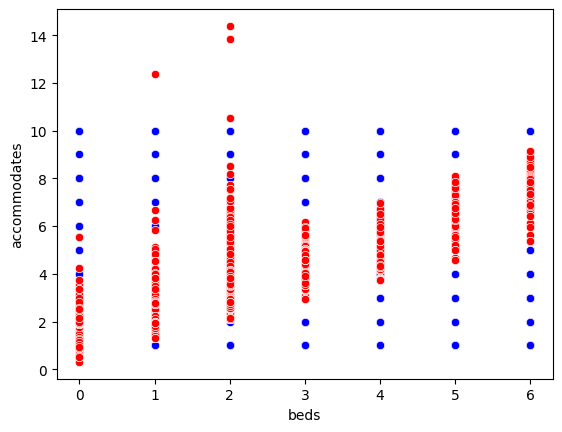

In [35]:
# Gráfica de comparación
sns.scatterplot(x = 'beds', y = 'accommodates', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'beds', y = 'Predict_Accommodates', color = "red", data = dfPredict)

# bedrooms

<Axes: >

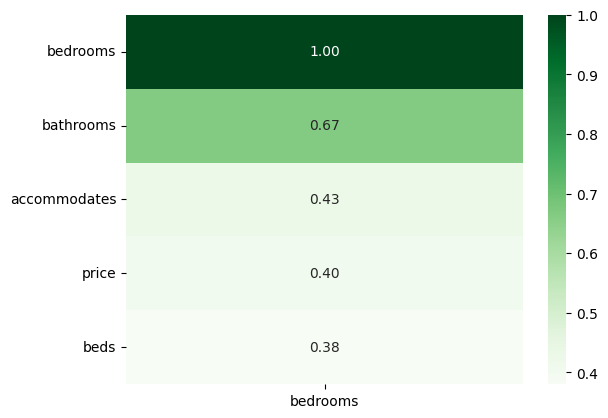

In [36]:
# Filtrando las correlaciones fuertes
bedroomsModel = abs(df.corr()['bedrooms'])
bedroomsModel = bedroomsModel[bedroomsModel.abs() > 0.30].sort_values(ascending=False).to_frame()
bedroomsModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map7 = sns.heatmap(bedroomsModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map7

In [37]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['bathrooms', 'accommodates', 'price', 'beds']] # Independiente = x
Var_Dep = df[["bedrooms"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['bathrooms', 'accommodates', 'price', 'beds']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Bedrooms', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_7 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_7 = np.sqrt(coef_Deter_7)
coef_Correl_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.713306673382387

In [38]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'accommodates', 'price', 'beds'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[7.02806334e-01, 1.46196320e-01, 8.97675951e-05, 4.63429690e-02]]),
 'rank_': 4,
 'singular_': array([1.92249007e+05, 2.93533223e+02, 1.45122292e+02, 1.18762147e+02]),
 'intercept_': array([-0.09543761])}

**Modelo matemático: Y = 7.02806334e-01x1 + 1.46196320e-01x2 + 8.97675951e-05x3 + 4.63429690e-02x4 -0.09543761**

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

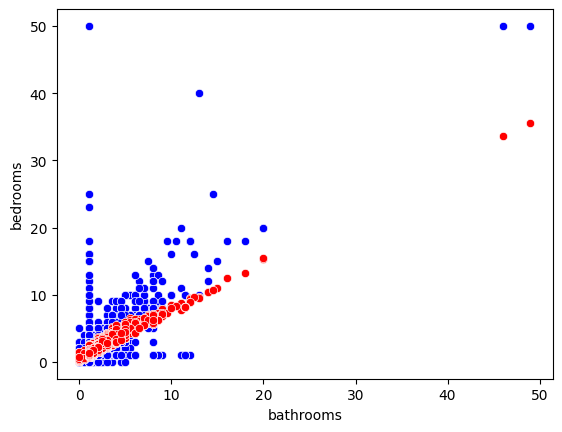

In [39]:
# Gráfica de comparación
sns.scatterplot(x = 'bathrooms', y = 'bedrooms', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bathrooms', y = 'Predict_Bedrooms', color = "red", data = dfPredict)

# Price

<Axes: >

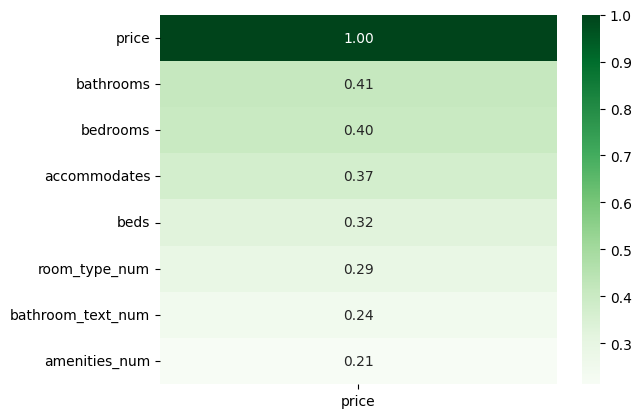

In [40]:
# Filtrando las correlaciones fuertes
PriceModel = abs(df.corr()['price'])
PriceModel = PriceModel[PriceModel.abs() > 0.20].sort_values(ascending=False).to_frame()
PriceModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map8 = sns.heatmap(PriceModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map8

In [41]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['bathrooms', 'bedrooms', 'accommodates', 'beds', 'room_type_num','bathroom_text_num', 'amenities_num']] # Independiente = x
Var_Dep = df[["price"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['bathrooms', 'bedrooms', 'accommodates', 'beds', 'room_type_num', 'bathroom_text_num', 'amenities_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_priceMex', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_8 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_8 = np.sqrt(coef_Deter_8)
coef_Correl_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.52443373371515

In [42]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'bedrooms', 'accommodates', 'beds', 'room_type_num',
        'bathroom_text_num', 'amenities_num'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 309.05062657,  111.59521428,   82.53441835,   53.77383936,
         -103.20138366, -113.93035333,    5.75796947]]),
 'rank_': 7,
 'singular_': array([2517.14609319,  338.50396504,  202.61389456,  156.99607019,
         119.05288241,  100.31390545,   66.72014144]),
 'intercept_': array([590.81087239])}

**Modelo matemático: Y = 309.05062657x1 +  111.59521428x2 +   82.53441835x3 +   53.77383936x4 -103.20138366x5  -113.93035333x6 +   5.75796947x7 + 590.81087239**

<Axes: xlabel='bathrooms', ylabel='price'>

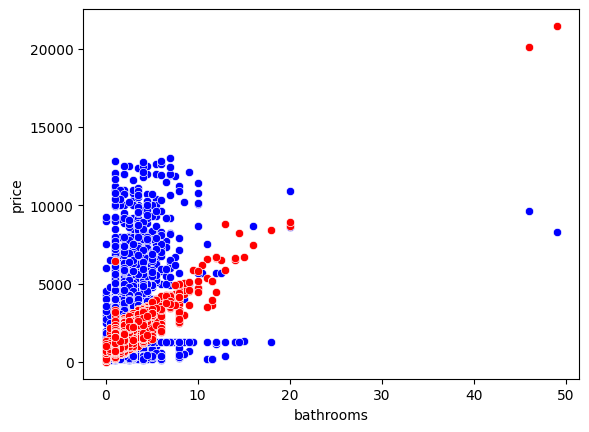

In [43]:

# Gráfica de comparación
sns.scatterplot(x = 'bathrooms', y = 'price', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bathrooms', y = 'Predict_priceMex', color = "red", data = dfPredict)

# review_scores_value

<Axes: >

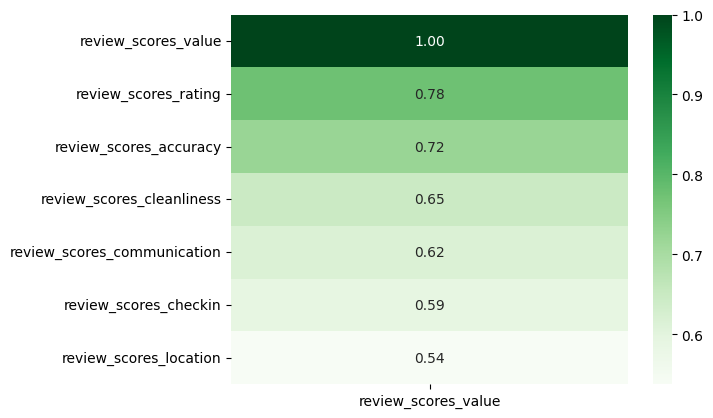

In [44]:
# Filtrando las correlaciones fuertes
reviewScoresModel = abs(df.corr()['review_scores_value'])
reviewScoresModel = reviewScoresModel[reviewScoresModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewScoresModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map9 = sns.heatmap(reviewScoresModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map9

In [45]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_checkin', 'review_scores_location']] # Independiente = x
Var_Dep = df[["review_scores_value"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_checkin', 'review_scores_location']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewScores', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_9 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_9 = np.sqrt(coef_Deter_9)
coef_Correl_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8140283411441009

In [46]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_communication',
        'review_scores_checkin', 'review_scores_location'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[0.44981899, 0.24319269, 0.14478292, 0.0729436 , 0.01805413,
         0.1249121 ]]),
 'rank_': 6,
 'singular_': array([116.35407776,  42.84840485,  36.95801231,  34.47731653,
         30.12530138,  28.77067655]),
 'intercept_': array([-0.29913496])}

**Modelo matemático: Y = 0.44981899x1 + 0.2431926x2 +  0.14478292x3 +  0.0729436x4 +  0.01805413x5 + 0.1249121x6 -0.29913496**

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

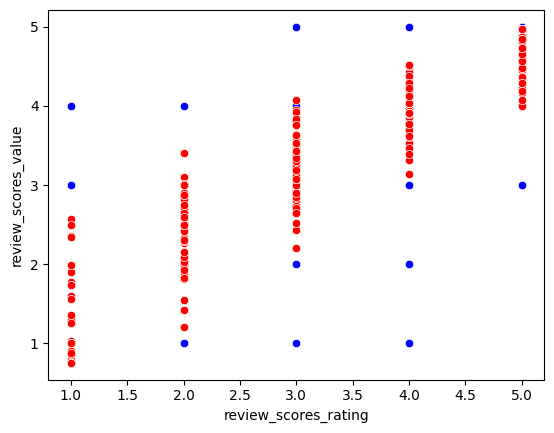

In [47]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_rating', y = 'review_scores_value', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'review_scores_rating', y = 'Predict_ReviewScores', color = "red", data = dfPredict)

# reviews_per_month

<Axes: >

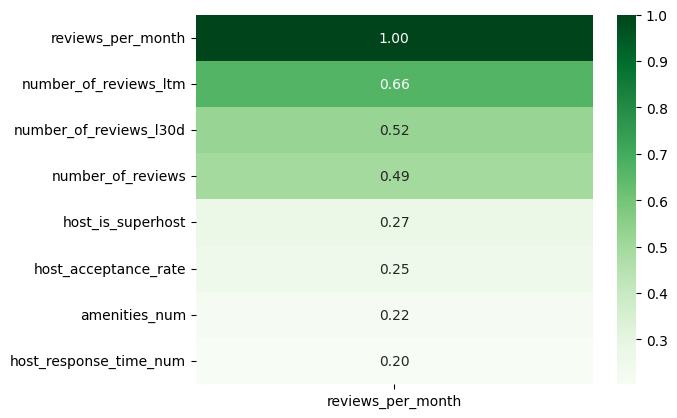

In [48]:
# Filtrando las correlaciones fuertes
reviewsMonthModel = abs(df.corr()['reviews_per_month'])
reviewsMonthModel = reviewsMonthModel[reviewsMonthModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewsMonthModel
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map10 = sns.heatmap(reviewsMonthModel, cmap = 'Greens', annot = True, fmt = ".2f")
Heat_Map10

In [49]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[['number_of_reviews_ltm','number_of_reviews_l30d', 'number_of_reviews','host_is_superhost','host_acceptance_rate', 'amenities_num', 'host_response_time_num']] # Independiente = x
Var_Dep = df[["reviews_per_month"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = df[['number_of_reviews_ltm','number_of_reviews_l30d', 'number_of_reviews','host_is_superhost','host_acceptance_rate', 'amenities_num', 'host_response_time_num']])

# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewsMonth', y_pred)
dfPredict

# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_10 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_10 = np.sqrt(coef_Deter_10)
coef_Correl_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6943951007490033

In [50]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews', 'host_is_superhost', 'host_acceptance_rate',
        'amenities_num', 'host_response_time_num'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[0.02871195, 0.11047287, 0.00446476, 0.11409066, 0.00285488,
         0.00076507, 0.06998912]]),
 'rank_': 7,
 'singular_': array([8284.98171075, 3561.58004292, 2554.89144468, 2306.25610482,
         204.38850728,   96.06531421,   88.24280668]),
 'intercept_': array([0.30539277])}

**Modelo matemático: Y = 0.02871195x1 + 0.11047287x2 + 0.00446476x3 + 0.11409066x4 + 0.00285488x5 + 0.00076507x6 + 0.06998912x7 + 0.30539277**

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

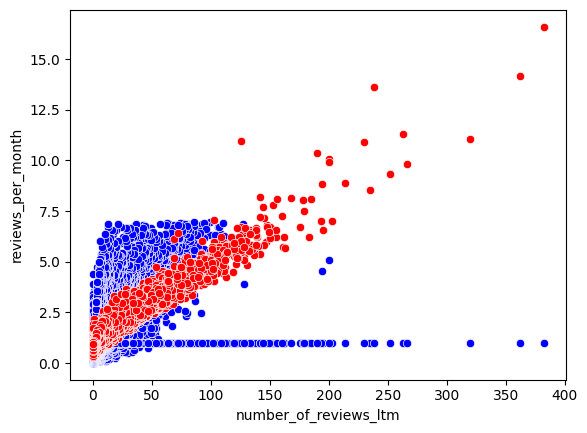

In [51]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'reviews_per_month', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'Predict_ReviewsMonth', color = "red", data = dfPredict)